In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()
# As we can see most of the values of 3 , 4 and 5th columns are null , we will remove these columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [6]:
df.head()
# Renaming the column names as v1 and v2 don't tell us anything about the data .
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Checking for null and duplicate values 
df.isnull().sum()
df.duplicated().sum()
# As there are duplicates in the dataset we will remove the duplicates .add()

df.drop_duplicates(inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Now we can replace ham and spam by numbers . We can either use an label encoder or a direct replace function
# Let's see by using the replace function first .add()
df['target'].replace(to_replace=['ham' , 'spam'] , value= [0,1]) # inplce = True

#let's try using the label encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])



C:\Users\Sahil Chalke\AppData\Local\Temp\ipykernel_14592\2808581434.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'].replace(to_replace=['ham' , 'spam'] , value= [0,1]) # inplce = True


In [11]:
df.head()
# Now let's deal with the text data .
# Let's get the count of number of characters in the text .
df['num_characters'] = df['text'].apply(len)

In [12]:
df.head()
# My method of finding the number of words in each text message .
# Let's see if it similar to NLTK's word tokenizer results .
#Both are giving nearly same results , but since the word_tokenize from nltk library uses advanced rules for tokenizing we will be using that .
num_words = []
total_counter = 0
for sent in df['text']:
    counter = 0
    for words in sent.split():
        # print(words)
        counter = counter + 1
    num_words.append(counter)
    total_counter += counter

print(num_words)
print(total_counter)

[20, 6, 28, 11, 13, 32, 16, 26, 26, 29, 21, 26, 26, 37, 8, 19, 4, 19, 13, 24, 8, 11, 11, 20, 11, 28, 5, 32, 15, 12, 26, 41, 6, 17, 29, 28, 9, 8, 4, 30, 17, 34, 33, 4, 13, 3, 8, 5, 14, 30, 12, 23, 16, 55, 22, 13, 27, 6, 4, 7, 23, 9, 6, 12, 24, 28, 23, 22, 15, 8, 8, 5, 10, 6, 5, 9, 14, 11, 7, 16, 4, 8, 10, 9, 3, 11, 26, 31, 9, 7, 10, 39, 26, 23, 20, 22, 5, 12, 39, 11, 21, 16, 36, 10, 17, 10, 14, 24, 6, 8, 5, 24, 27, 24, 32, 27, 12, 15, 20, 26, 8, 27, 13, 7, 4, 46, 5, 27, 5, 2, 5, 4, 25, 28, 6, 8, 9, 32, 20, 8, 5, 26, 10, 7, 10, 29, 15, 6, 7, 9, 15, 4, 80, 5, 5, 33, 19, 27, 24, 13, 19, 24, 30, 10, 27, 13, 13, 10, 10, 20, 6, 21, 11, 14, 6, 30, 16, 25, 31, 6, 13, 5, 4, 32, 7, 24, 13, 19, 10, 38, 6, 22, 19, 7, 6, 14, 30, 8, 5, 18, 26, 3, 7, 13, 5, 13, 9, 14, 6, 2, 5, 6, 9, 9, 7, 8, 35, 6, 30, 26, 21, 13, 30, 5, 27, 8, 20, 8, 6, 8, 34, 9, 15, 7, 27, 25, 10, 7, 16, 32, 6, 17, 8, 6, 30, 23, 8, 34, 5, 37, 7, 18, 10, 9, 27, 15, 1, 18, 11, 25, 6, 7, 11, 27, 9, 24, 9, 29, 25, 9, 6, 1, 9, 7, 11, 10,

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sahil
[nltk_data]     Chalke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [16]:
df.head()
# Now let's find the number of sentences in a record or text message .
# Let's try it without using NLTK package .
# We cannot be using these method as there can be multiple unwanted '.' in the sentence .
# Hence we will use NLTK package .

num_sentence = []
for sent in df['text']:
    counter = 0
    for words in sent.split(sep="."):
        # print(words + "%%")
        # print(counter)
        counter = counter + 1
    # print('--------------------------------------------')
    num_sentence.append(counter)
    total_counter += counter

print(num_sentence)


[9, 7, 2, 7, 1, 2, 3, 2, 4, 1, 2, 2, 3, 4, 1, 3, 4, 6, 2, 3, 1, 1, 7, 3, 2, 6, 2, 1, 1, 3, 1, 4, 2, 1, 2, 7, 1, 1, 7, 2, 4, 13, 2, 1, 5, 5, 2, 1, 1, 5, 3, 1, 1, 7, 3, 1, 4, 2, 1, 4, 4, 3, 1, 1, 3, 2, 6, 4, 1, 2, 10, 2, 1, 3, 4, 3, 3, 2, 1, 4, 1, 2, 1, 1, 2, 3, 3, 4, 1, 4, 1, 4, 1, 1, 3, 4, 3, 2, 4, 3, 1, 3, 5, 1, 3, 1, 1, 6, 3, 1, 3, 4, 6, 10, 6, 1, 1, 6, 2, 2, 1, 2, 2, 1, 2, 5, 2, 2, 3, 2, 3, 2, 3, 4, 3, 2, 2, 2, 13, 1, 2, 7, 2, 1, 1, 3, 4, 3, 3, 3, 2, 7, 7, 1, 4, 2, 3, 1, 1, 2, 4, 4, 5, 2, 5, 1, 3, 2, 2, 12, 1, 5, 6, 1, 1, 1, 2, 4, 4, 3, 3, 1, 2, 1, 1, 1, 2, 6, 5, 6, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 4, 1, 1, 1, 3, 1, 2, 7, 1, 2, 3, 3, 1, 5, 3, 6, 7, 4, 3, 3, 2, 8, 1, 3, 1, 1, 3, 5, 2, 1, 1, 8, 1, 2, 1, 4, 5, 1, 3, 1, 2, 6, 3, 1, 9, 1, 3, 1, 1, 4, 4, 1, 1, 1, 4, 2, 1, 2, 2, 1, 3, 3, 2, 1, 3, 5, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 3, 1, 5, 6, 1, 2, 3, 1, 3, 4, 1, 12, 2, 1, 1, 3, 1, 1, 5, 10, 1, 3, 1, 1, 3, 4, 1, 4, 3, 3, 13, 1, 1, 4, 1, 7, 2, 4, 2, 1, 1, 1, 3, 4, 4, 3, 4, 4, 1

In [17]:
# Number of sentences using the NLTK package .

df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

<Axes: >

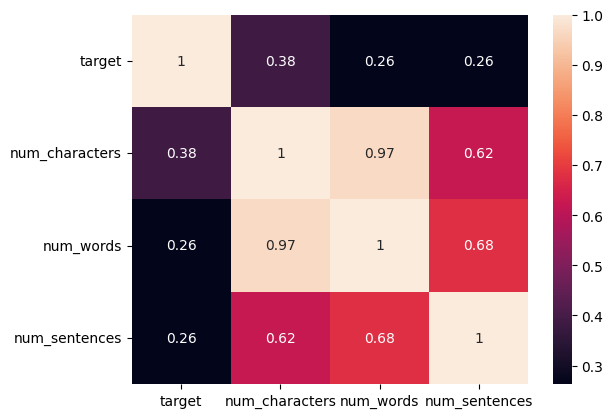

In [18]:
df.head()
# Just checking the correlation matrix to find the correlation between different attributes .
df[['num_characters' , 'num_words' , 'num_sentences']].corr()
# For further better visualization we can use HEATMAP from seaborn
import seaborn as sns
sns.heatmap(df[['target','num_characters' , 'num_words' , 'num_sentences']].corr() , annot=True)

In [19]:
df.head()
# Now we can tronsform the text into more informative text . 
# We can do so by removing the stop words . DONE
# Normalizing the words by keeping all the words in lower case . DONE
# By finding the stem words for a word and replacing it with the stem word . DONE
# By removing the punctuation marks . DONE

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
from nltk.corpus import stopwords
import string
# print(string.punctuation)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sahil
[nltk_data]     Chalke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.stem import PorterStemmer


In [22]:

stop_words = stopwords.words('english')
# print(stop_words)
punctuations = string.punctuation
porter = PorterStemmer()
# porter.stem("Laughing")
      
def transform_text(text):
    text = text.lower() # to lower case

    y = ""
    for word in text.split():
        if word not in stop_words and word not in punctuations: # removing the stop words and punctuation marks .
            y += word+" "
            
    text = y
    y = ""
    for word in text.split():
        y += porter.stem(word)+" " # replacing words with there stem words .
    text = y
    return text.rstrip()

In [23]:
transform_text("Sahil is enjoying playing cricket and he is batting .")

'sahil enjoy play cricket bat'

In [24]:
df['transformed_text'] = df['text'].apply(transform_text)

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [26]:
# Let's create a Word Cloud to find the words that we maximum used .
from wordcloud import WordCloud

wc = WordCloud(height=500 , width=500 , background_color='white')



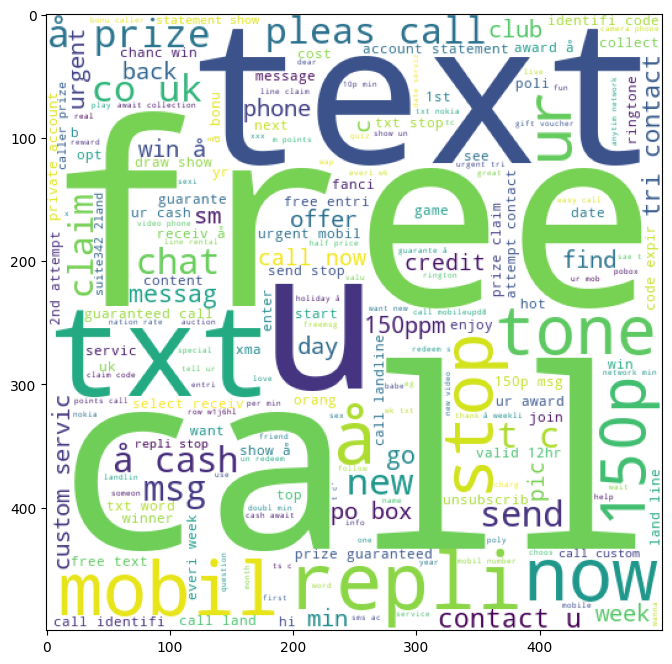

In [27]:
# WORD CLOUD FOR SPAM TEXT
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

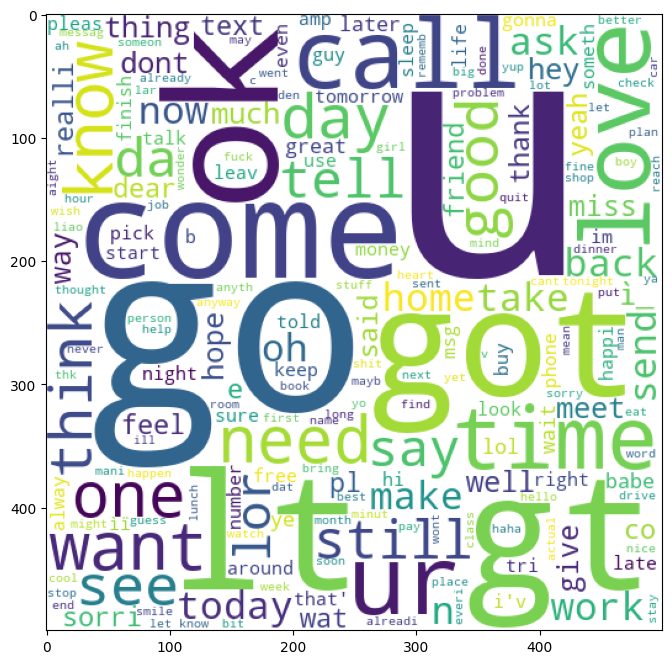

In [28]:
# WORD CLOUD FOR HAM MESSAGES
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [29]:
from collections import Counter
# Counter(df['text'])
words_list = []
for sent in df['transformed_text']:
    words = sent.split()
    words_list.extend(words)

most_common = Counter(words_list).most_common(30)

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Count'])
common_words_df.head()



,Word,Count
0,u,890
1,call,524
2,2,423
3,get,411
4,go,408


C:\Users\Sahil Chalke\AppData\Local\Temp\ipykernel_14592\2614548588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
c:\Users\Sahil Chalke\anaconda3\envs\myenv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sahil Chalke\anaconda3\envs\myenv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sahi

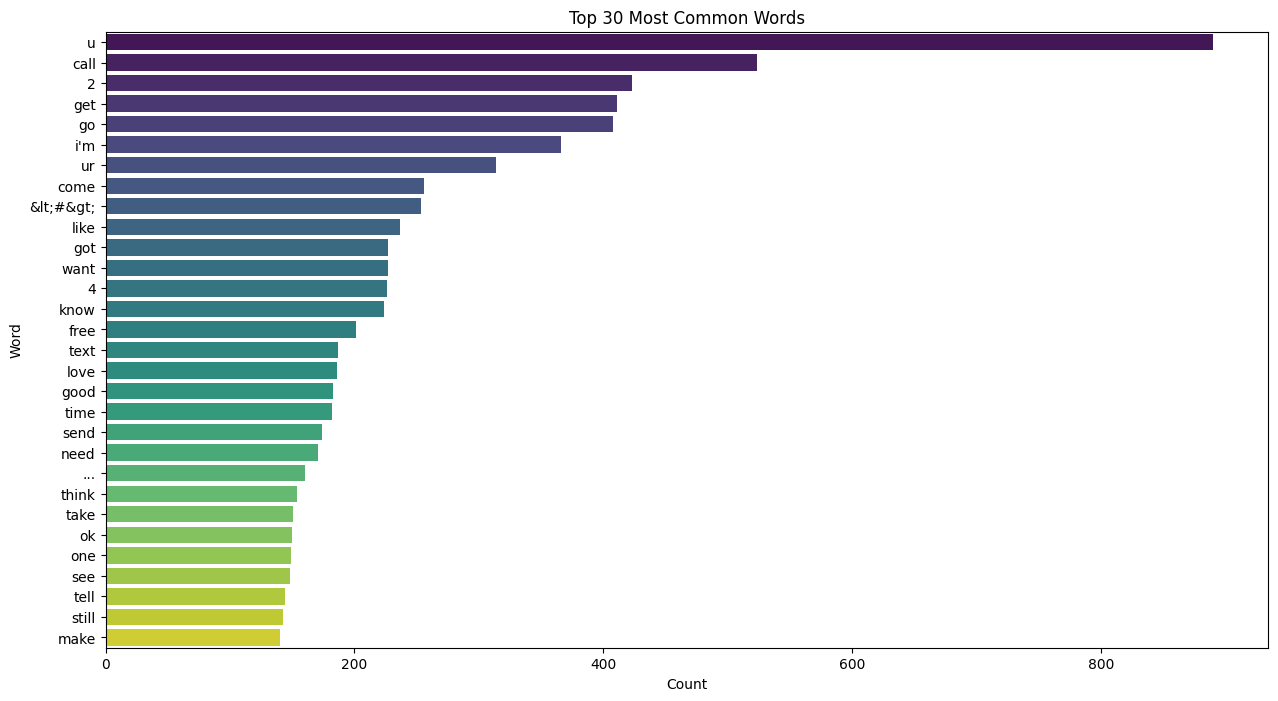

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB


In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [33]:
# Before using the Naive Baiyes Alogrithm we need to convert the text into numerical data . (VECTORIZATION)
# We can do it in different ways .
# BAG OF WORDS
# TFIDF
# WORD TO VEC
from sklearn.feature_extraction.text import CountVectorizer # BAG OF WORDS  

cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()


In [34]:
# Let's try TFIDF for Vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [35]:
y = df['target']

In [36]:
from sklearn.model_selection import train_test_split

train_X , test_X , train_Y , test_Y = train_test_split(X , y , train_size=0.8 , random_state=0)

In [37]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [38]:
gnb =  GaussianNB()
gnb.fit(train_X , train_Y)
y_pred = gnb.predict(test_X)
print("Accuracy Score : " , accuracy_score(test_Y , y_pred))
print(confusion_matrix(test_Y , y_pred))
print("Precision Score : " , precision_score(test_Y , y_pred))


Accuracy Score :  0.8839458413926499
[[787  98]
 [ 22 127]]
Precision Score :  0.5644444444444444


In [39]:
mnb =  MultinomialNB()
mnb.fit(train_X , train_Y)
y_pred = mnb.predict(test_X)
print("Accuracy Score : " , accuracy_score(test_Y , y_pred))
print(confusion_matrix(test_Y , y_pred))
print("Precision Score : " , precision_score(test_Y , y_pred))


Accuracy Score :  0.9671179883945842
[[885   0]
 [ 34 115]]
Precision Score :  1.0


In [40]:
bnb =  BernoulliNB()
bnb.fit(train_X , train_Y)
y_pred = bnb.predict(test_X)
print("Accuracy Score : " , accuracy_score(test_Y , y_pred))
print(confusion_matrix(test_Y , y_pred))
print("Precision Score : " , precision_score(test_Y , y_pred))


Accuracy Score :  0.9825918762088974
[[884   1]
 [ 17 132]]
Precision Score :  0.9924812030075187


In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [42]:
svm = SVC(kernel='rbf')
mnb =  MultinomialNB()
knn = KNeighborsClassifier()
dt1 = DecisionTreeClassifier(random_state=0)
dt2 = DecisionTreeClassifier(splitter='random'  , random_state=0)
rf = RandomForestClassifier(random_state=0)
adaBoost = AdaBoostClassifier(random_state=0)
bagging = BaggingClassifier(random_state=0)
extraTree = ExtraTreesClassifier(random_state=0)
gradient = GradientBoostingClassifier(random_state=0)

In [43]:
acc_list = []
prec_list = []

In [44]:
models = {
    'SVC' : svm,
    'MNB' : mnb,
    'KNN' : knn,
    'DT1' : dt1,
    'DT2' : dt2,
    'RF' : rf,
    'ADABOOST' : adaBoost,
    'BAG' : bagging,
    'ETREE' : extraTree,
    'GRADIENT' : gradient
}

In [45]:
models_2 = [svm , mnb , knn , dt1 , dt2 , rf , adaBoost , bagging , extraTree , gradient]

In [46]:

def solve(model , acc_list , prec_list):
    model.fit(train_X , train_Y)
    y_pred = model.predict(test_X)
    # print("Accuracy Score : " , accuracy_score(test_Y , y_pred))
    acc_list.append(accuracy_score(test_Y , y_pred))
    prec_list.append(precision_score(test_Y , y_pred))
    # print(confusion_matrix(test_Y , y_pred))
    # print("Precision Score : " , precision_score(test_Y , y_pred))

    
    

In [47]:

for model in models_2:
    solve(model ,acc_list=acc_list , prec_list=prec_list)


c:\Users\Sahil Chalke\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [57]:
new_array= np.array([list(models.keys()), acc_list, prec_list])
new_array
second = pd.DataFrame(data=new_array )


In [60]:
first

,0,1,2,3,4,5,6,7,8,9
0,SVC,MNB,KNN,DT1,DT2,RF,ADABOOST,BAG,ETREE,GRADIENT
1,0.97678916827853,0.9671179883945842,0.902321083172147,0.960348162475822,0.9738878143133463,0.9816247582205029,0.9555125725338491,0.9661508704061895,0.9854932301740812,0.9680851063829787
2,0.9844961240310077,1.0,0.98,0.8552631578947368,0.9236111111111112,1.0,0.905511811023622,0.9014084507042254,1.0,0.9754098360655737


In [62]:
import pickle
pickle.dump(transform_text , open('transform_text.pkl' , 'wb'))
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(extraTree , open('model.pkl' , 'wb'))